Data science projects usually consist of one of two things:

1. An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.
2. An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices will rise and fall would be one example.


We'll walk through the first part of a complete data science project, including how to acquire the raw data. The project will focus on exploring and analyzing a data set. We'll develop our data cleaning and storytelling skills, which will enable us to build complete projects on our own.

The first step in creating a project is to decide on a topic. We want the topic to be something we're interested in and motivated to explore. It's very obvious when people are making projects just to make them, rather than out of a genuine interest in the topic.

Here are two ways to go about finding a good topic:

* Think about what sectors or angles we're really interested in, then find data sets relating to those sectors.
* Review several data sets, and find one that seems interesting enough to explore.

Whichever approach we take, we can start our search at these sites:

* [Data.gov](https://www.data.gov/) - A directory of government data downloads
* [/r/datasets](https://www.reddit.com/r/datasets) - A subreddit that has hundreds of interesting data sets
* [Awesome datasets](https://github.com/awesomedata/awesome-public-datasets) - A list of data sets hosted on GitHub
* [rs.io](http://rs.io/100-interesting-data-sets-for-statistics/) - A great blog post with hundreds of interesting data sets

In real-world data science, we may not find an ideal data set. We might have to aggregate disparate data sources instead, or do a good amount of data cleaning.

For the purposes of this project, we'll be using data about **New York City public schools**, which can be found [here](https://data.cityofnewyork.us/browse?category=Education).

Once we've chosen a topic, we'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze, but isn't so complicated that it's difficult to get started. We want to finish the project, and we want our results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Investigating the correlations between **SAT** scores and **demographics** might be an interesting angle to take. We could correlate **SAT scores** with factors like `race`, `gender`, `income`, and more

The **SAT**, or **Scholastic Aptitude Test**, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its data [on high school SAT scores available](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2).

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
* [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each school in New York City
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
* [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated, and other outcome information
* [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
* [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

* Only high school students take the SAT, so we'll want to focus on high schools.
* New York City is made up of five boroughs, which are essentially distinct regions.
* New York City schools fall within several different school districts, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
* Each school in New York City has a unique code called a `DBN`, or **district borough number**.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

Once we've done our background research, we're ready to read in the data. We've placed all the data into the schools folder. Here are all of the files in the folder:

* `ap_2010.csv` - Data on [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e)
* `class_size.csv` - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
* `demographics.csv` - Data on [demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j)
* `graduation.csv` - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a)
* `hs_directory.csv` - A directory of [high schools](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2)
* `sat_results.csv` - Data on [SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)
* `survey_all.txt` - Data on [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) from all schools
* `survey_d75.txt` - Data on [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) from New York City [district 75](https://www.schools.nyc.gov/academics/specialEducation/D75/default.htm)

We'll focus on reading in the CSV files only, and then explore them.

Data sets are in the schools folder. That means the path to `ap_2010.csv` is **schools/ap_2010.csv**

In [1]:
import pandas as pd

files = ["ap_2010.csv","class_size.csv","demographics.csv","graduation.csv",
         "graduation.csv","hs_directory.csv", "sat_results.csv"]

data = {}
for f in files:
    df = pd.read_csv('schools/{}'.format(f))
    key = f.replace('.csv',"")
    data[key] = df

In [2]:
# Display the first five rows of the SAT scores data

data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

* The `DBN` appears to be a unique ID for each school.
* We can tell from the first few rows of names that we only have data about high schools.
* There's only a single row for each high school, so each` DBN` is unique in the `SAT` data.
* We may eventually want to combine the three columns that contain SAT scores -- `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` -- into a single column to make the scores easier to analyze.

In [3]:
for key in data:
    display(data[key].head(1))

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend ...


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363


We can make some observations based on the first few rows of each one.

* Each data set appears to either have a `DBN` column, or the information we need to create one. That means we can use a `DBN` column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical **DBNs**, then group all of their columns together in a single data set.
* Some fields look interesting for mapping -- particularly `Location 1`, which contains coordinates inside a larger string.
* Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate `DBN` values). That means we’ll have to do some preprocessing to ensure that each `DBN` is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (`survey_all.txt` and `survey_d75.txt`), but we didn't read those files in because they're in a slightly more complex format.

The files are **tab delimited** and **encoded with Windows-1252 encoding**. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are `UTF-8` and `ASCII`. `Windows-1252` is rarely used, and can cause errors if we read such a file in without specifying the encoding.

In [4]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter = "\t", encoding = "windows-1251")
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter = "\t", encoding = "latin-1")

In [5]:
survey = pd.concat([all_survey,d75_survey], axis = 0)
survey.head(1)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two immediate facts that we can see in the data:

* There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
* The survey data has a `dbn` column that we'll want to convert to uppercase (**DBN**). The conversion will make the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. There's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

In [6]:
# Based on the dictionary, it looks like these are the relevant columns:

survey["DBN"] = survey["dbn"]

survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
        "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", 
        "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", 
        "com_tot_11", "eng_tot_11", "aca_tot_11"]


These columns will give us aggregate survey data about how **parents**, **teachers**, and **students** feel about **school safety**, **academic performance**, and more. It will also give us the `DBN`, which allows us to uniquely identify the school.

In [7]:
survey = survey[survey_fields]

# Assign the dataframe survey to the key survey in the dictionary data.
data["survey"] = survey

In [8]:
data["survey"].shape

(1702, 23)

When we explored all of the data sets, we noticed that some of them, like `class_size` and `hs_directory`, don't have a **DBN** column. `hs_directory` does have a `dbn` column, though, so we can just rename it.

However, `class_size` doesn't appear to have the column at all.

In [9]:
data["class_size"].head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


In [10]:
data["sat_results"].head(1)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363


From looking at these rows, we can tell that the **DBN** in the `sat_results` data is just a combination of the `CSD` and `SCHOOL CODE` columns in the `class_size` data. The main difference is that the `DBN` is padded, so that the **CSD** portion of it always consists of two digits. That means we'll need to add a leading **0** to the `CSD` if the `CSD` is less than two digits long.

In [11]:
# Copy the dbn column in hs_directory into a new column called DBN

data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [12]:
# Create a new column called padded_csd in the class_size data set
def paddded(x):
    if len(x)<2:
        return x.zfill(2) # or "0" + x
    else:
        return x

data["class_size"]["padded_csd"] = data["class_size"]["CSD"].astype(str).apply(paddded) 
# or data["class_size"]["padded_csd"] = data["class_size"]["CSD"].astype(str).str.zfill(2)
data["class_size"]["padded_csd"].head()

0    01
1    01
2    01
3    01
4    01
Name: padded_csd, dtype: object

In [13]:
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"].head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015


We'll need to convert the `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score`, and `SAT Writing Avg. Score` columns in the `sat_results` data set from the object (`string`) data type to a numeric data type. We can use the `pandas.to_numeric()` method for the conversion

It's important to pass the keyword argument `errors="coerce"` when we call `pandas.to_numeric()`, so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

In [14]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 
        'SAT Writing Avg. Score']

for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors = "coerce") # it will convert into float

In [15]:
data["sat_results"]["sat_score"] = data["sat_results"][cols].sum(axis = 1)
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [16]:
# extract the latitude and the longitude
pattern = r'\((.+)\)' # r'\((.+,.+\)
coordinates = data["hs_directory"]["Location 1"].str.extract(pattern)[0].str.split(",")
coordinates.head()

0    [40.589238098,  -73.981746524]
1    [40.685451806,  -73.993491465]
2    [40.744149536,  -73.933626741]
3    [40.815230365,  -73.955201206]
4    [40.601989336,  -73.762834323]
Name: 0, dtype: object

In [17]:
data["hs_directory"]["lat"] = coordinates.str[0]
data["hs_directory"]["lon"] = coordinates.str[1]
print(data["hs_directory"]["lat"].head(2))
print()
print(data["hs_directory"]["lon"].head(2))

0    40.589238098
1    40.685451806
Name: lat, dtype: object

0     -73.981746524
1     -73.993491465
Name: lon, dtype: object


In [18]:
# alternative method to extract coordinates
import re

def coordinate(x):
    string = str(x)
    pattern = r'\((.+)\)' # or ("\(.+, .+\)"
    coord = re.findall(pattern, string)
    return coord

coordinates = data["hs_directory"]["Location 1"].apply(coordinate)
coordinates.head(3)

0    [40.589238098, -73.981746524]
1    [40.685451806, -73.993491465]
2    [40.744149536, -73.933626741]
Name: Location 1, dtype: object

In [19]:
# convert lat and lon into numeric values
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors= "coerce")
data["hs_directory"]["lat"].head(2)

0    40.589238
1    40.685452
Name: lat, dtype: float64

In [20]:
data["hs_directory"]["lon"] = data["hs_directory"]["lon"].astype(float)
data["hs_directory"]["lon"].head(2)

0   -73.981747
1   -73.993491
Name: lon, dtype: float64

# Combining the Data

The first thing we'll need to do in preparation for the merge is condense some of the data sets. We noticed that the values in the `DBN` column were unique in the `sat_results` data set. Other data sets like `class_size` had duplicate `DBN` values, however.

We'll need to condense these data sets so that each value in the `DBN` column is unique. 

To resolve this issue, we'll condense the `class_size`, `graduation`, and `demographics` data sets so that each `DBN` is unique.

The first data set that we'll condense is `class_size`

In [21]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


We can see, the first few rows all pertain to the same school, which is why the `DBN` appears more than once. It looks like each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`

In [22]:
# unique values for GRADE
data["class_size"]['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Because we're dealing with high schools, we're only concerned with grades **9** through **12**. That means we only want to pick rows where the value in the `GRADE` column is `09-12`.

In [23]:
# unique values for PROGRAM TYPE
data["class_size"]['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

In [24]:
# Create a new variable called class_size, and assign the value of data["class_size"] to it.

class_size = data["class_size"]

In [25]:
class_size = class_size[(class_size['GRADE '] == "09-12") & (class_size['PROGRAM TYPE'] == "GEN ED")]
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


`DBN` still isn't completely unique. This is due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns.

In [26]:
class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique **DBN** values, while also incorporating as much data as possible into the average.

In [27]:
# average values for each column associated with each DBN in class_size.

class_size = class_size.groupby("DBN").agg("mean") 
# the column we performed the grouping on (in this case DBN) become the index
class_size.reset_index(inplace = True)
class_size.head(3)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,33.0,1.0,33.000000,33.0,33.000000,NaN


In [28]:
data["class_size"] = class_size

In [29]:
# condense demographics
demographics = data["demographics"]
demographics.head(2)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4


In this case, the only column that prevents a given `DBN` from being unique is `schoolyear`. We only want to select rows where schoolyear is `20112012`. This will give us the most recent year of data, and also match our `SAT results` data.

In [30]:
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics


In [31]:
# condense the graduation data set
graduation = data["graduation"]
graduation.head(6)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.9,32,50.0,69.6,...,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique in the graduation data.In this case, we want to pick data from the most recent Cohort available, which is `2006`. We also want data from the full cohort, so we'll only pick rows where Demographic is `Total Cohort`.

In [32]:
graduation = graduation[(graduation["Cohort"] == '2006') & (graduation["Demographic"] == "Total Cohort") ]
data["graduation"] = graduation

The only remaining thing to do is convert the `Advanced Placement (AP) test scores` from **strings** to **numeric** values. There are several **AP exams**, each corresponding to a school subject. High school students who earn high scores may receive college credit.
AP exams have a 1 to 5 scale; 3 or higher is a passing score.

There are three columns we'll need to convert:

* AP Test Takers (note that there's a trailing space in the column name)
* Total Exams Taken
* Number of Exams with scores 3 4 or 5

In [33]:
cols = ["AP Test Takers ","Total Exams Taken",
        "Number of Exams with scores 3 4 or 5"]

# covnerting columns to numeric 
for c in cols:
    data["ap_2010"][c] = data["ap_2010"][c].astype(float) #  pd.to_numeric(data["ap_2010"][c], errors = "coerce")
data["ap_2010"].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

Both the `ap_2010` and the `graduation` data sets have many missing `DBN` values, so we'll use a `left join` when we merge the `sat_results` data set with them. Because we're using a left join, our final dataframe will have all of the same `DBN` values as the original `sat_results` dataframe.

In [34]:
combined = pd.merge(left = data["sat_results"], right = data["ap_2010"], on = "DBN", how = "left")
combined = combined.merge(data["graduation"], on = "DBN", how = "left") # alternate method of merging

In [35]:
cols = ["class_size","demographics", "survey", "hs_directory"]

for c in cols:
    combined = pd.merge(combined, data[c], on = "DBN", how  = "inner")

In [36]:
combined.shape

(363, 165)

We now have many columns with null (`NaN`) values. This is because we chose to do left joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like `correlations`).

If a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the `df.fillna()` method along with the `df.mean()` method, because there won't be a mean.

In [37]:
means = combined.mean()
combined.fillna(means, inplace = True)


In [38]:
# Fill in any NAN (remaining missing) values in combined with 0 
combined = combined.fillna(0)

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. 

Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the `DBN`.

In [39]:
combined["school_dist"] = combined["DBN"].str[:2]
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

# Analyzing and Visualizing the Data

The first thing we'll do is find any correlations between any of the columns and `sat_score`. This will help us determine which columns might be interesting to plot out or investigate further

Correlations tell us how closely related two columns are. We'll be using the [r value](https://app.dataquest.io/m/138/data-cleaning-walkthrough%3A-analyzing-and-visualizing-the-data/2/finding-correlations-with-the-r-value), also called **Pearson's correlation coefficient**, which measures how closely two sequences of numbers are correlated.

An `r` value falls between -1 and 1. The value tells us whether two columns are **positively correlated**, **not correlated**, or **negatively correlated**. The closer to `1` the `r` value is, the **stronger** the **positive correlation** between the two columns. The closer to `-1` the `r` value is, the **stronger** the **negative correlation** (i.e., the more "opposite" the columns are). The closer to `0`, the **weaker** the correlation. 

In general, `r` values above **.25** or below **-.25** are enough to qualify a correlation as interesting. An `r` value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape."

Because we're interested in exploring the fairness of the **SAT**, a **strong positive or negative correlation** between a **demographic factor** like `race` or `gender` and `SAT score` would be an interesting result meriting investigation. If **men** tended to score higher on the **SAT**, for example, that would indicate that the **SAT** is potentially unfair to **women**, and vice-versa.

We can use the pandas `pandas.DataFrame.corr()` method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.

In [40]:
correlations = combined.corr()
correlations

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
SAT Critical Reading Avg. Score,1.000000,0.929221,0.982826,0.472399,0.490283,0.483479,0.441813,0.289710,0.584661,0.659326,...,NaN,NaN,NaN,-0.059377,-0.071264,0.054326,0.050692,0.042381,-0.119993,-0.126479
SAT Math Avg. Score,0.929221,1.000000,0.931385,0.465612,0.545646,0.533239,0.469456,0.379012,0.541928,0.637366,...,NaN,NaN,NaN,-0.059206,-0.061451,0.054875,0.079725,0.072564,-0.134572,-0.120055
SAT Writing Avg. Score,0.982826,0.931385,1.000000,0.472854,0.501648,0.495321,0.451790,0.282701,0.598018,0.672042,...,NaN,NaN,NaN,-0.060942,-0.092805,0.033909,0.020753,0.013163,-0.100551,-0.143850
sat_score,0.472399,0.465612,0.472854,1.000000,0.254925,0.250432,0.221759,0.161070,0.281050,0.326649,...,NaN,NaN,NaN,-0.020646,0.032513,0.060709,0.084705,0.089536,-0.080811,-0.048274
AP Test Takers,0.490283,0.545646,0.501648,0.254925,1.000000,0.992192,0.901513,0.602802,0.240070,0.301233,...,NaN,NaN,NaN,0.004111,0.061276,0.091317,0.107707,0.104981,-0.104464,-0.053121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Census Tract,0.054326,0.054875,0.033909,0.060709,0.091317,0.095639,0.084971,0.055696,0.070918,0.075438,...,NaN,NaN,NaN,0.183482,0.039992,1.000000,0.177204,0.180936,-0.105527,0.276771
BIN,0.050692,0.079725,0.020753,0.084705,0.107707,0.088725,0.028227,0.266026,0.002023,-0.002685,...,NaN,NaN,NaN,0.088865,0.783021,0.177204,1.000000,0.996551,-0.573413,0.263042
BBL,0.042381,0.072564,0.013163,0.089536,0.104981,0.086072,0.026998,0.267190,-0.011794,-0.016293,...,NaN,NaN,NaN,0.076719,0.783850,0.180936,0.996551,1.000000,-0.563403,0.260492
lat,-0.119993,-0.134572,-0.100551,-0.080811,-0.104464,-0.092747,-0.049501,-0.173088,-0.045115,-0.069427,...,NaN,NaN,NaN,-0.157286,-0.730447,-0.105527,-0.573413,-0.563403,1.000000,0.280425


In [41]:
# Filter correlations so that it only shows correlations for the column sat_score.
correlations["sat_score"]

SAT Critical Reading Avg. Score    0.472399
SAT Math Avg. Score                0.465612
SAT Writing Avg. Score             0.472854
sat_score                          1.000000
AP Test Takers                     0.254925
                                     ...   
Census Tract                       0.060709
BIN                                0.084705
BBL                                0.089536
lat                               -0.080811
lon                               -0.048274
Name: sat_score, Length: 85, dtype: float64

Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`, and `sat_score` are strongly correlated with `sat_score`.

We can also make some other observations:

* `total_enrollment` has a strong positive correlation with `sat_score`. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
* Other columns that are proxies for **enrollment** correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
* Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with `SAT score`, whereas the percentage of males (`male_per`) and the number of males (`male_num`) correlate negatively. This could indicate that **women** do better on the SAT than **men**.
* Teacher and student ratings of school safety (`saf_t_11`, and `saf_s_11`) correlate with `sat_score`.
* Student ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
* There is significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
* The percentage of English language learners at the school (`ell_percent`, `frl_percent`) has a strong negative correlation with **SAT scores**.

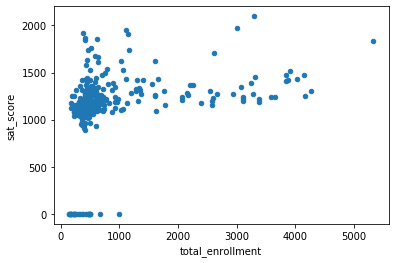

In [42]:
# Create a scatterplot of total_enrollment versus sat_score.
import matplotlib.pyplot as plt

combined.plot("total_enrollment", "sat_score", kind = "scatter") 
# plt.scatter(x = combined["total_enrollment"], y = combined["sat_score"])
# combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between `sat_score` and `total_enrollment`. If there was a very strong correlation, we'd expect all of the points to line up. 

Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the `r` value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

Filter the combined dataframe to keep only those rows where `total_enrollment` is under 1000 and `sat_score` is under 1000. Assign the result to `low_enrollment`

In [43]:
low_enrollment = combined[(combined["total_enrollment"] < 1000) & (combined["sat_score"] < 1000)]
low_enrollment['School Name'].value_counts()

0                                        29
IT TAKES A VILLAGE ACADEMY                1
HIGH SCHOOL OF WORLD CULTURES             1
INTERNATIONAL SCHOOL FOR LIBERAL ARTS     1
INTERNATIONAL HIGH SCHOOL AT PROSPECT     1
INTERNATIONAL COMMUNITY HIGH SCHOOL       1
PAN AMERICAN INTERNATIONAL HIGH SCHOO     1
MULTICULTURAL HIGH SCHOOL                 1
BRONX INTERNATIONAL HIGH SCHOOL           1
BROOKLYN INTERNATIONAL HIGH SCHOOL        1
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL     1
FOUNDATIONS ACADEMY                       1
Name: School Name, dtype: int64

Our research above revealed that, most of the **high schools** with **low total enrollment** and **low SAT scores** have high percentages of English language learners. This indicates that it's actually `ell_percent` that correlates strongly with `sat_score`, rather than `total_enrollment`.

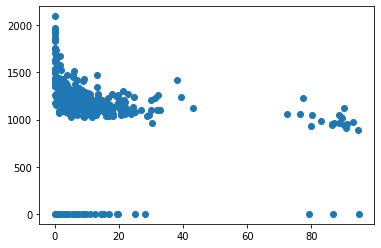

In [44]:
# Create a scatterplot of ell_percent versus sat_score.

plt.scatter(combined["ell_percent"], combined["sat_score"])
plt.show()

In [45]:
combined[["ell_percent","sat_score"]].corr()

,ell_percent,sat_score
ell_percent,1.0000,-0.2479
sat_score,-0.2479,1.0000


It looks like `ell_percent` correlates with `sat_score` more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very **high** `ell_percent` values and **low** `sat_score values`. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out `ell_percent` by school district. The map will show us which areas of the city have a lot of English language learners.

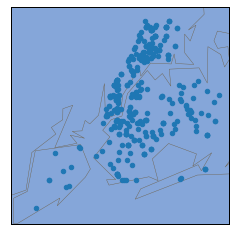

In [46]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection ="merc", llcrnrlat = 40.496044, urcrnrlat = 40.915256,
            llcrnrlon = -74.255735, urcrnrlon = -73.700272,resolution = "i",)
#  map that centers on New York City (llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the geographic area the map depicts)
m.drawmapboundary(fill_color = "#85A6D9")
m.drawcoastlines(color = "#6D5F47", linewidth = .4)
m.drawrivers(color = "#6D5F47", linewidth = .4)
latitudes = combined["lat"].tolist()
longitudes = combined["lon"].tolist()
m.scatter(longitudes, latitudes, s = 20, zorder = 2, latlon = True) 
#  zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
# keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
plt.show()

From the map above, we can see that school density is highest in **Manhattan** (the top of the map), and lower in **Brooklyn**, the **Bronx**, **Queens**, and **Staten Island**.

Now that we've plotted the school locations, we can begin to display meaningful information on the maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword argument **c** into the `scatter()` method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers accordingly.

The method will convert the sequence of numbers we pass into the **c** keyword argument to values ranging from `0` to `1`. It will then map these values onto a colormap. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points for low numbers, and yellow points for high numbers

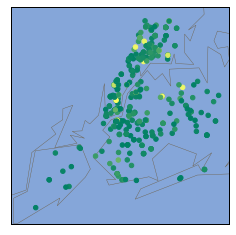

In [47]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection = "merc", llcrnrlat = 40.496044, urcrnrlat = 40.915256, 
            llcrnrlon = -74.255735, urcrnrlon = -73.700272, resolution = "i")
m.drawmapboundary(fill_color = "#85A6D9")
m.drawcoastlines(color = "#6D5F47", linewidth = .4)
m.drawrivers(color = "#6D5F47", linewidth = .4)
latitudes = combined["lat"].tolist()
longitudes = combined["lon"].tolist()
m.scatter(longitudes, latitudes, s = 20, zorder = 2, latlon = True, 
          c = combined["ell_percent"], cmap = "summer")
plt.show()

Unfortunately, due to the number of schools, it's hard to interpret the map we made above. It looks like **uptown Manhattan** and **parts of Queens** have a higher `ell_percent`, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot `ell_percent` **district-by-district** instead of **school-by-school**.

In [48]:
# average values for each column for each school_dist

districts = combined.groupby("school_dist").agg("mean")
districts = districts.reset_index()
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1142.708333,128.908454,201.516827,157.495833,158.647849,75.453574,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,987.583333,156.183494,244.522436,193.087500,183.384409,74.029937,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1110.285714,85.722527,115.725275,142.464286,143.677419,75.200881,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


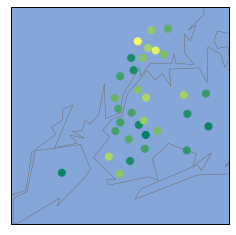

In [49]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection = "merc", llcrnrlat =40.496044 , urcrnrlat =40.915256 , llcrnrlon =-74.255735 , urcrnrlon = -73.700272, resolution = "i")

m.drawmapboundary(fill_color = '#85A6D9')
m.drawcoastlines(color = '#6D5F47', linewidth = .4)
m.drawrivers(color = '#6D5F47', linewidth = .4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()

m.scatter(longitudes,latitudes, s = 50, zorder = 2, latlon = True, c = districts["ell_percent"],  cmap = "summer")
plt.show()

In [50]:
print(survey_fields)

['DBN', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']


# Plotting survey correlations

In [51]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

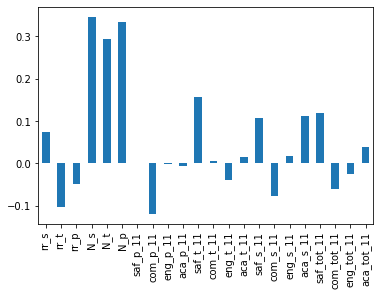

In [52]:
%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar()

There are high correlations between `N_s`, `N_t`, `N_p` and `sat_score`. Since these columns are correlated with `total_enrollment`, it makes sense that they would be high.

It is more interesting that `rr_s`, the **student response rate**, or the **percentage of students** that completed the survey, correlates with `sat_score`. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (`saf_t_11` and `saf_s_11`) correlate with `sat_score`. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the `aca_s_11`, which indicates how the student perceives **academic standards**, correlates with `sat_score`, but this is not true for `aca_t_11`, how teachers perceive academic standards, or `aca_p_11`, how parents perceive academic standards.

We have noticed that `saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school, correlated highly with `sat_score`. Below, we'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

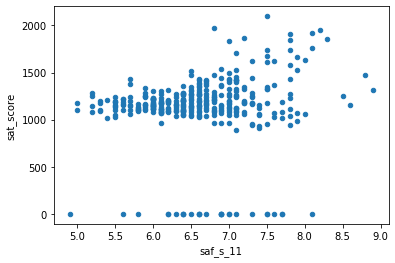

In [53]:
combined.plot.scatter("saf_s_11", "sat_score")
plt.show()

There appears to be a correlation between `SAT scores` and `safety`, although it isn't that strong. It looks like there are a few schools with extremely **high `SAT scores`** and **high `safety scores`**. 

There are a few schools with **low `safety scores`** and **low `SAT scores`**. No school with a `safety score` lower than `6.5` has an average `SAT score` higher than `1500` or so.

# Plotting safety

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

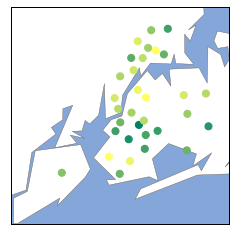

In [55]:
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace = True)

m = Basemap(projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i')

m.drawrivers(color='#6D5F47', linewidth=.4)
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawmapboundary(fill_color='#85A6D9')
m.fillcontinents(color = "white",lake_color='#85A6D9')
latitudes = districts["lat"].tolist()
longitudes = districts["lon"].tolist()
m.scatter(longitudes,latitudes,latlon = True, zorder = 2, s = 50, 
          c = districts["saf_s_11"],
          cmap = "summer")

plt.show()

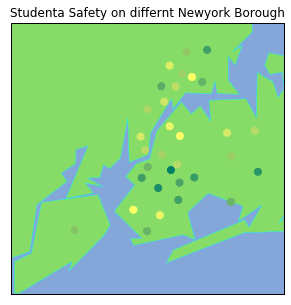

In [66]:
# Alternate of above with few changes
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Studenta Safety on differnt Newyork Borough")

m = Basemap(projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution="i")

# Resolution of boundary database to use. 
# Can be c (crude), l (low), i (intermediate), h (high), f (full) or None. 
# If None, no boundary data will be read in
# and class methods such as drawcoastlines will raise an if invoked.
# Resolution drops off by roughly 80% between datasets. 
# Higher res datasets are much slower to draw. Default c.

m.drawrivers(color='aqua', linewidth=.4)
m.drawcoastlines(color='aqua', linewidth=.4)
m.drawmapboundary(fill_color='#85A6D9')
m.fillcontinents(color = "#86DC67",lake_color='aqua')
latitudes = districts["lat"].tolist()
longitudes = districts["lon"].tolist()
m.scatter(longitudes,latitudes,latlon = True, zorder = 2, s = 50, 
          c = districts["saf_s_11"],
          cmap = 'summer')

plt.show()

It looks like **Upper Manhattan** and **parts of Queens** and the **Bronx** tend to have higher safety scores, whereas **Brooklyn** has low safety scores.

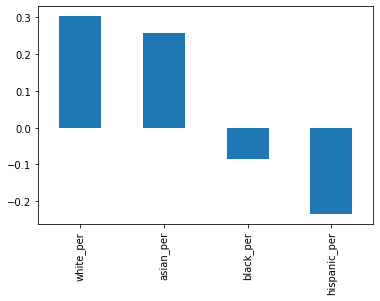

In [57]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()
plt.show()

It looks like a higher percentage of **white** or **asian** students at a school correlates positively with `sat score`, whereas a higher percentage of **black** or **hispanic** students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of **black** or **hispanic** students.

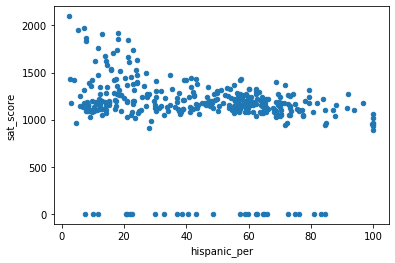

In [58]:
combined.plot.scatter("hispanic_per", "sat_score")
plt.show()

In [59]:
combined.loc[combined["hispanic_per"]>95,"SCHOOL NAME"]

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [60]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low `hispanic_per`, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

# Gender differences in SAT scores

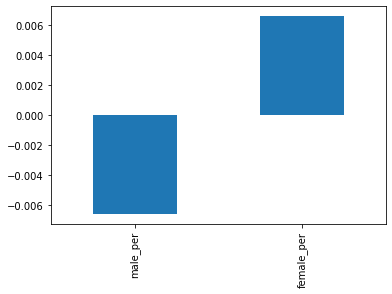

In [61]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()
plt.show()

In the plot above, we can see that a high percentage of **females** at a school positively correlates with `SAT score`, whereas a high percentage of **males** at a school negatively correlates with `SAT score`. Neither correlation is extremely strong.

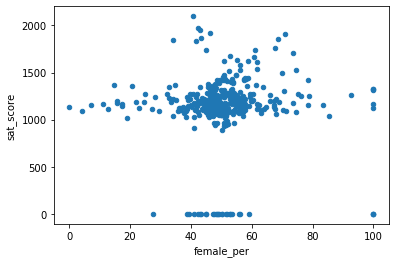

In [62]:
combined.plot.scatter("female_per", "sat_score")
plt.show()

Based on the scatterplot, there doesn't seem to be any real correlation between `sat_score` and `female_per`. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [63]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appears to be very selective liberal arts schools that have high academic standards.

# AP Exam Scores vs SAT Scores

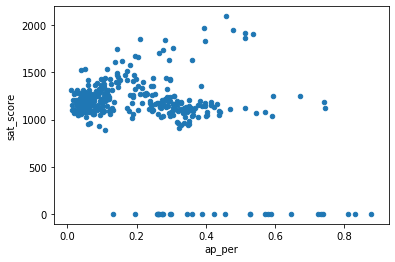

In [64]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score')
plt.show()

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.